## Exercise: kmeans analysis with a given data set

### Tasks 
- Use the data from the "kmeans_exercise.csv" data to classify it into different groups using kmeans.
- Identfy the optimal number of groups according to you analysis by using the intertia parameter.
- Load the column "kmeans_exercize_y.csv" and compare your grouping with the grouping in this file.
- The function defined below "plot_clusters_3d" can be used to plot 3d-data as a scatter plot. Use this function to look at your data. You can plot it with just your Data without the target but you can also use your target values in y.
- Plot the inertia as a function of k and identify a deflection point!
- Plot your results and compare them with the target values of y! Maybe you have to rearrange the coloring! This can be done with the following:
``` y2['target'] = y2['target'].replace({ 0: 'orange', 1: 'blue', 2: 'green', 3: 'red', 4: 'purple', 5: 'cyan' }) ```
- We have to use this because seaborn's hui parameter does'nt work for a 3d-scatterplot.
- Don't forget to document your code!
- Try to do all tasks and answer all questions!

### Questions
1. How many features does the data set have?
2. Are you using a pandas data frame or a numpy array for your kmeans analysis, this is up to you?
3. How many different groups does the data set have according to the target feature of y from "kmeans_exercize_y.csv"?
4. Which measure is used to find the optimal number of clusters in kmeans?
5. Which distance measure is used by kmeans in sklearn?

In [1]:
import numpy as np
import pandas as pd
# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

#import the file fruit_data_with_colors.txt
X = pd.read_csv(r"kmeans_exercise.csv")
y = pd.read_csv(r"kmeans_exercise_y.csv")
y

,target
0,5
1,1
2,4
3,5
4,3
...,...
1995,1
1996,0
1997,2
1998,1


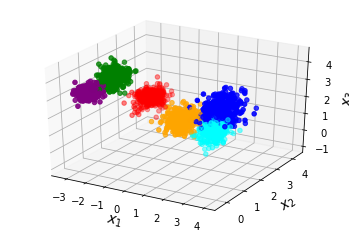

In [2]:
# here we prepare a function for plotting 3d-scatterplots!
# you can invoke the function with just the data, then all the points will have the same color.
# if you want to change that we have to tell matplotlib which color it has to use, therefore
# we create a new target variable y2 with colors instead of the numbers for the groups!

from mpl_toolkits.mplot3d import Axes3D
y2 = y
y2['target'] = y2['target'].replace({ 0: 'orange', 1: 'blue', 2: 'green', 3: 'red', 4: 'purple', 5: 'cyan' })

#print(y)

def plot_clusters_3d(X,y2=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if (y2 is None): 
        ax.scatter(X["X1"], X["X2"], X["X3"])
    else: 
        ax.scatter(X["X1"], X["X2"], X["X3"], c=y2['target'])
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_zlabel("$x_3$", fontsize=14)
    plt.show()

plot_clusters_3d(X,y2)

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)

In [8]:
y_predict = km.fit_predict(X)
y3 = pd.DataFrame(y_predict, columns=["target"])
y3['target'] = y3['target'].replace({ 0: 'orange', 1: 'blue', 2: 'green', 3: 'red', 4: 'purple', 5: 'cyan' })


In [9]:
j=1
l=1
for i in range(len(y2)):
    if(y2["target"][i] == y3["target"][i]):
#        print("equal")
        j=j+1
    else:
#        print("not equal")
        l=l+1
print("There are, ",l, "times not equal values!")

There are,  1667 times not equal values!
